**Servo Prediction using Linear Regression**

-------------

## **Objective**

A servomechanism is a control system that uses negative feedback to control the position and velocity of a mechanical system. The name literally means "serving machine". Servomechanisms can use electronic, hydraulic, or mechanical devices to control the power of an object. They are used in everyday household objects, but they're also instrumental when it comes to automation and robotics.

The variables that decribes datasets and their values are following:

  1.   Motor A,B,C,D,E
  2.   Screw A,B,C,D,E
  3.   Pgain 3,4,5,6
  4.   Vgain 1,2,3,4,5
  5.   Class 0.13 to 7.10




## **Data Source**

It is taken from YBI FOUNDATION dataset repository.

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

## **Import Data**

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

## **Describe Data**

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [5]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [6]:
df.shape

(167, 5)

## **Data Visualization**

In [7]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

## **Data Preprocessing**

In [9]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [10]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [25]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [26]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [27]:
y=df['Class']
y.shape

(167,)

In [28]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [29]:
X=df[['Motor', 'Screw', 'Pgain', 'Vgain',]]

In [30]:
X=df.drop('Class',axis=1)

In [31]:
X.shape

(167, 4)

In [32]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Train Test Split**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=2529)



In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 4), (117, 4), (50,), (117,))

## **Modeling**

In [53]:
from sklearn.linear_model import LinearRegression

## **Model Evaluation**

In [54]:
lr=LinearRegression()

In [55]:
lr.fit(X_train,y_train)

LinearRegression()

## **Prediction**

In [56]:
y_pred=lr.predict(X_test)

In [57]:
y_pred.shape

(117,)

In [58]:
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

**Model Accuracy**


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error(y_test,y_pred)

7.158141394974153

In [60]:
mean_squared_error(y_test,y_pred)

73.57022323365531

In [61]:
r2_score(y_test,y_pred)

0.6372902527668625

**Get Visualization of Actual vs Predict Results**

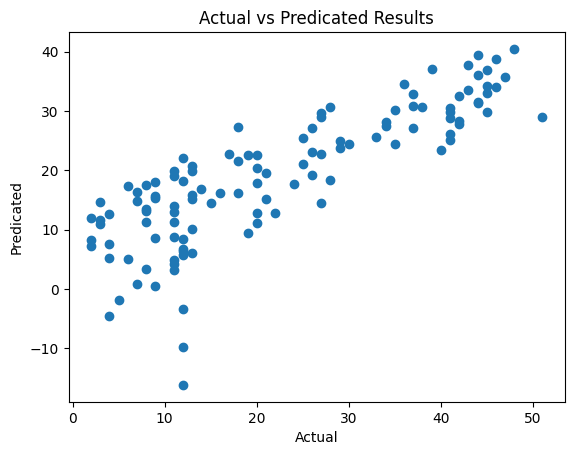

In [63]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicated")
plt.title("Actual vs Predicated Results")
plt.show()

**Get Future Predictions**


**Let select a random samplefrom existing dataset as new value**

Steps to follow

1.   Extract a randow raw using sample function
2.   Separte X and y
3.   Standardise X
4.   Predict








In [76]:
X_new=df.sample(1)

In [77]:
X_new

,Motor,Screw,Pgain,Vgain,Class
113,1,0,4,3,28


In [78]:
X_new.shape

(1, 5)

In [79]:
X_new=X_new.drop('Class',axis=1)

In [80]:
X_new

,Motor,Screw,Pgain,Vgain
113,1,0,4,3


In [81]:
X_new.shape

(1, 4)

In [82]:
y_pred_new=lr.predict(X_new)

In [84]:
y_pred_new

array([30.69170015])